In [27]:
import pandas as pd
import numpy as np
mg=pd.read_csv("major_groups.csv")
pf=pd.read_csv("public_firms.csv")  
#mg.head()
#pf.head()

firms= pf[(pf["sic"]>=5800) & (pf["sic"]<=5899)]   

In [28]:
#Unique no of firm-year are 27
print(len(firms["fyear"].unique()))

27


In [29]:
#Unique no of firms are 252
print(len(firms["conm"].unique()))


252


In [30]:
#DARDEN RESTAURANTS INC = 27
new=firms.groupby("conm")[["fyear"]].nunique()
new[new["fyear"]==27]

,fyear
conm,
DARDEN RESTAURANTS INC,27


In [31]:
firms[firms["fyear"]==2020.0].sort_values("prcc_c", ascending=False)[["conm","prcc_c"]].head(10)

,conm,prcc_c
187903,CHIPOTLE MEXICAN GRILL INC,1386.71
181039,DOMINO'S PIZZA INC,383.46
24624,MCDONALD'S CORP,214.58
80756,WINGSTOP INC,132.55
10228,CRACKER BARREL OLD CTRY STOR,131.92
113017,DARDEN RESTAURANTS INC,119.12
9795,BIGLARI HOLDINGS INC,111.20
141481,YUM BRANDS INC,108.56
88350,STARBUCKS CORP,106.98
50183,JACK IN THE BOX INC,92.80


In [32]:
firms.groupby("conm")[['sale']].sum().sort_values("sale", ascending=False).head(10)

,sale
conm,
MCDONALD'S CORP,517754.100
SODEXO,393959.674
STARBUCKS CORP,270978.501
YUM BRANDS INC,243378.000
DARDEN RESTAURANTS INC,158341.992
ARAMARK CORP,150100.066
ARAMARK,130479.905
BRINKER INTL INC,74836.564
CRACKER BARREL OLD CTRY STOR,58448.876


In [33]:
firms.groupby("location")[["conm"]].nunique().sort_values("conm",ascending=False).head(10)

,conm
location,
USA,236
CAN,5
CHN,3
BRA,1
FRA,1
GBR,1
HKG,1
JPN,1
NIC,1


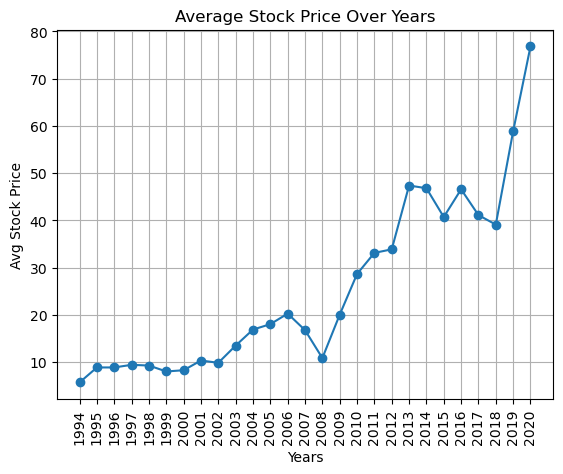

In [34]:
import matplotlib.pyplot as plt 
line_c=firms.groupby("fyear")[["prcc_c"]].mean()
x=line_c.index
y=line_c["prcc_c"]
plt.plot(x,y, marker='o')
plt.xticks(x,rotation=90)
plt.title("Average Stock Price Over Years")
plt.xlabel("Years")
plt.ylabel("Avg Stock Price")
plt.grid()

In [35]:
firms_07= firms[(firms["fyear"]==2007)][["conm","gvkey","fyear","prcc_c"]]
firms_08= firms[(firms["fyear"]==2008)][["conm","gvkey","fyear","prcc_c"]]
firms_0708= pd.merge(firms_07,firms_08, on="gvkey",suffixes=('_2007', '_2008'))
firms_0708["percentage_drop"]=(firms_0708["prcc_c_2007"]-firms_0708["prcc_c_2008"])*100/firms_0708["prcc_c_2007"]
firms_0708.sort_values("percentage_drop", ascending=False)[:1]

,conm_2007,gvkey,fyear_2007,prcc_c_2007,conm_2008,fyear_2008,prcc_c_2008,percentage_drop
32,GRILL CONCEPTS INC,29346,2007,4.16,GRILL CONCEPTS INC,2008,0.24,94.230769


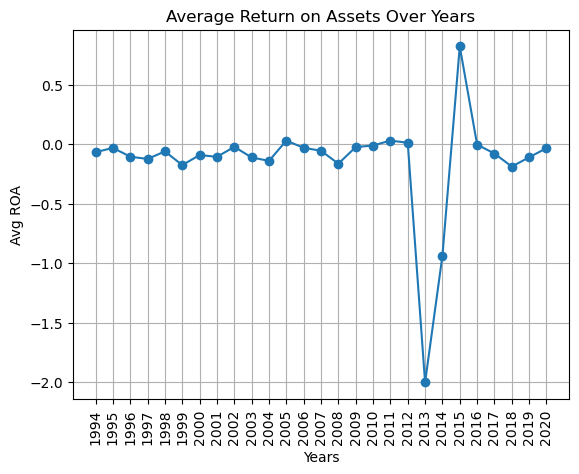

In [36]:
USA_firms=firms[firms["location"]=="USA"].groupby("fyear")[["roa"]].mean()
x=USA_firms.index
y=USA_firms["roa"]
plt.plot(x,y, marker='o')
plt.xticks(x,rotation=90)
plt.title("Average Return on Assets Over Years")
plt.xlabel("Years")
plt.ylabel("Avg ROA")
plt.grid()

In [37]:
import nltk
import string


from nltk.corpus import stopwords
#nltk.download('stopwords')


data2020_10k=pd.read_csv("2020_10K_item1_full.csv")

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

def clean_text(text):
    # lower case
    clean_text = text.lower()

    # remove punctuation
    clean_text = clean_text.translate(translator)

    # remove stopwords
    clean_words = [w for w in clean_text.split() if w not in sw]
    
    return ' '.join(clean_words)

data2020_10k['item_text']=data2020_10k['item_1_text'].apply(clean_text)


In [38]:
data2020_10k['item_text'].head()

0    fixed expenses previosuly documented 8k 235000...
1    general hurco companies inc international indu...
2    engaged business developing marketing products...
3    corporate history chun capital group formerly ...
4    corporate history chun capital group formerly ...
Name: item_text, dtype: object

In [39]:
#firms data for 2020 only
firms_2020=firms[firms["fyear"]==2020]

In [40]:
firms_10K= pd.merge(firms_2020, data2020_10k, on='gvkey', how='inner', suffixes=('_left','_right'))
firms_10K.head()

from collections import Counter

def get_keywords_wc(text):
    c = Counter(text.split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words)

firms_10K['keyword_clean_wc'] = firms_10K['item_text'].apply(get_keywords_wc)

firms_10K.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_text,keyword_clean_wc
0,3007,2020,USA,BRINKER INTL INC,NaN,5812,56.57,43.900,24.400,2356.000,3078.500,0.010357,703351,2020,"BRINKER INTERNATIONAL, INC","General References to Brinker, the Company,...",general references brinker company us form 10k...,restaurant fiscal 2020 restaurants chili pande...
1,3424,2020,USA,BIGLARI HOLDINGS INC,NaN,5812,111.20,24.503,-37.989,1017.968,433.683,-0.037318,1726173,2020,Biglari Holdings Inc.,Biglari Holdings Inc. is a holding company own...,biglari holdings inc holding company owning su...,company restaurant business franchise insuranc...
2,3570,2020,USA,CRACKER BARREL OLD CTRY STOR,NaN,5812,131.92,436.996,-32.475,2544.258,2522.792,-0.012764,1067294,2020,"CRACKER BARREL OLD COUNTRY STORE, INC","OVERVIEW Cracker Barrel Old Country Store, Inc...",overview cracker barrel old country store inc ...,2020 store stores restaurant retail food items...
3,3708,2020,USA,WENDY'S CO,NaN,5812,21.92,306.989,117.832,5040.006,1733.825,0.023379,30697,2020,Wendy's Co,Company Overview Wendy s is primarily engaged ...,company overview wendy primarily engaged busin...,wendy restaurants restaurant company franchise...
4,7154,2020,USA,MCDONALD'S CORP,NaN,5812,214.58,3449.100,4730.500,52626.800,19207.800,0.089888,63908,2020,MCDONALDS CORP,Overview Ameriprise Certificate Company ( ACC ...,overview ameriprise certificate company acc in...,acc certificate rates certificates ameriprise ...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_keywords_tfidf(document_list):

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %100 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')
        
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords

keywords = get_keywords_tfidf(firms_10K['item_text'].tolist())
firms_10K['keyword_clean_tfidf'] =  keywords
firms_10K.head()

Processing the 0/46 document.


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_text,keyword_clean_wc,keyword_clean_tfidf
0,3007,2020,USA,BRINKER INTL INC,NaN,5812,56.57,43.900,24.400,2356.000,3078.500,0.010357,703351,2020,"BRINKER INTERNATIONAL, INC","General References to Brinker, the Company,...",general references brinker company us form 10k...,restaurant fiscal 2020 restaurants chili pande...,maggiano chili pandemic covid19 restaurant fis...
1,3424,2020,USA,BIGLARI HOLDINGS INC,NaN,5812,111.20,24.503,-37.989,1017.968,433.683,-0.037318,1726173,2020,Biglari Holdings Inc.,Biglari Holdings Inc. is a holding company own...,biglari holdings inc holding company owning su...,company restaurant business franchise insuranc...,oil guard shake biglari sizzlin steak restaura...
2,3570,2020,USA,CRACKER BARREL OLD CTRY STOR,NaN,5812,131.92,436.996,-32.475,2544.258,2522.792,-0.012764,1067294,2020,"CRACKER BARREL OLD COUNTRY STORE, INC","OVERVIEW Cracker Barrel Old Country Store, Inc...",overview cracker barrel old country store inc ...,2020 store stores restaurant retail food items...,barrel cracker store pbs stores 2020 retail re...
3,3708,2020,USA,WENDY'S CO,NaN,5812,21.92,306.989,117.832,5040.006,1733.825,0.023379,30697,2020,Wendy's Co,Company Overview Wendy s is primarily engaged ...,company overview wendy primarily engaged busin...,wendy restaurants restaurant company franchise...,wendy restaurants restaurant companyoperated f...
4,7154,2020,USA,MCDONALD'S CORP,NaN,5812,214.58,3449.100,4730.500,52626.800,19207.800,0.089888,63908,2020,MCDONALDS CORP,Overview Ameriprise Certificate Company ( ACC ...,overview ameriprise certificate company acc in...,acc certificate rates certificates ameriprise ...,acc certificate certificates ameriprise rates ...


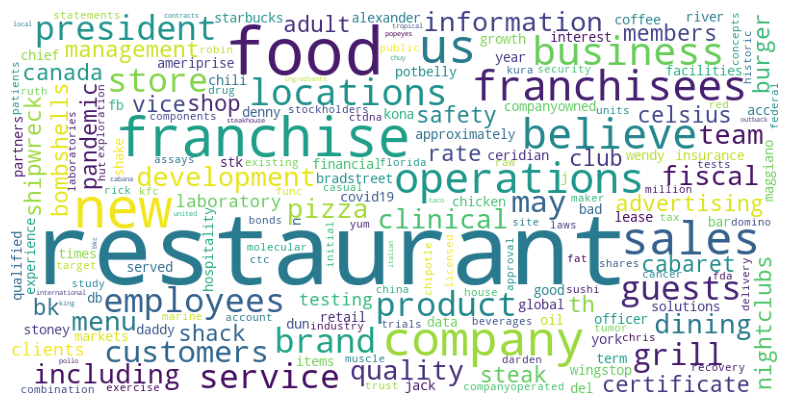

In [42]:
#!conda install -c conda-forge wordcloud -y
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text1 = ' '.join(firms_10K['keyword_clean_wc'].tolist())

wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.savefig('keyword_wc.png') # save as PNG file
plt.axis('off')

plt.show()

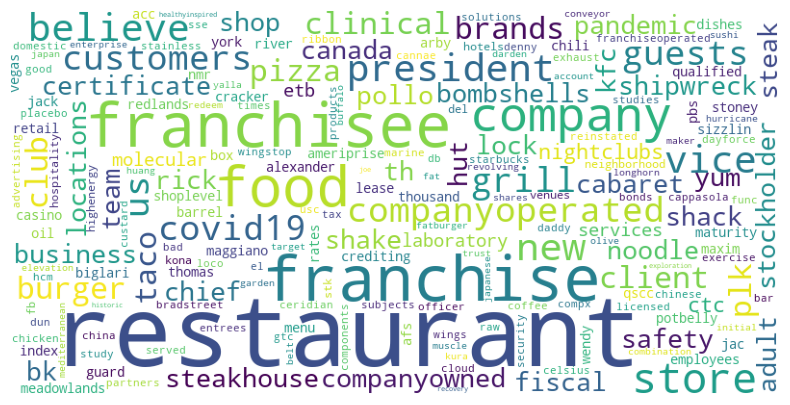

In [43]:
text2 = ' '.join(firms_10K['keyword_clean_tfidf'].tolist())

#lower max_font_size
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.savefig('keyword_tfidf.png') # save as PNG file
plt.axis('off')

plt.show()

In [44]:
#!conda install gensim -y

import pandas as pd
from gensim.models import Word2Vec
sent = [row.split() for row in firms_10K['item_text']]

model = Word2Vec(sent, min_count=1, vector_size=50, workers=3, window=3, sg = 1)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [45]:
print(model.wv.most_similar('drivethru')[:5])
print()
print(model.wv.most_similar('grill')[:5])
print()
print(model.wv.most_similar('franchise')[:5])

[('format', 0.9767647385597229), ('category', 0.9762662649154663), ('kitchens', 0.9760705232620239), ('dinein', 0.9752644896507263), ('carryout', 0.9720006585121155)]

[('italian', 0.9261906147003174), ('stoney', 0.9128882884979248), ('carrabba', 0.9066435694694519), ('steakhouse', 0.9021524786949158), ('wine', 0.9008519053459167)]

[('master', 0.9149573445320129), ('franchisee', 0.9067129492759705), ('agreements', 0.893153190612793), ('bargaining', 0.873023271560669), ('fees', 0.8653981685638428)]


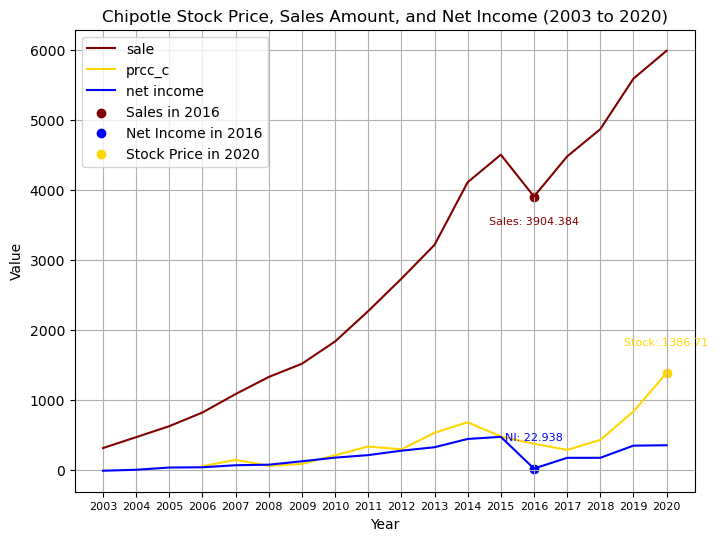

In [46]:
firms_chipotle=firms[firms["gvkey"]==165914]

plt.figure(figsize=(8, 6))# Adjust the figure size as needed
dark_yellow = "#FFD700" 
plt.plot(firms_chipotle["fyear"],firms_chipotle["sale"],label="sale", color="maroon")
plt.plot(firms_chipotle["fyear"],firms_chipotle["prcc_c"],label="prcc_c", color= dark_yellow)
plt.plot(firms_chipotle["fyear"],firms_chipotle["ni"],label="net income", color="blue")

# Show data points
year_2016 = 2016
year_2020 = 2020

sales_2016 = firms_chipotle[firms_chipotle["fyear"] == year_2016]["sale"] #sales data in 2016
ni_2016 = firms_chipotle[firms_chipotle["fyear"] == year_2016]["ni"] #net income data in 2016
stock_2020 = firms_chipotle[firms_chipotle["fyear"] == year_2020]["prcc_c"] #stock price data in 2020

plt.scatter(year_2016, sales_2016, color="maroon", marker="o", label="Sales in 2016")
plt.scatter(year_2016, ni_2016, color="blue", marker="o", label="Net Income in 2016")
plt.scatter(year_2020, stock_2020, color= dark_yellow, marker="o", label="Stock Price in 2020")

# Annotate the data point with the sales value
plt.annotate(f"Sales: {sales_2016.values[0]}", (year_2016, sales_2016), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=8, color="maroon")
plt.annotate(f"NI: {ni_2016.values[0]}", (year_2016, ni_2016), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8, color="blue")
plt.annotate(f"Stock: {stock_2020.values[0]}", (year_2020, stock_2020), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8, color=dark_yellow)

plt.legend()
plt.xticks(range(2003, 2021), fontsize=8)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Chipotle Stock Price, Sales Amount, and Net Income (2003 to 2020)')
plt.grid(True)

plt.show()


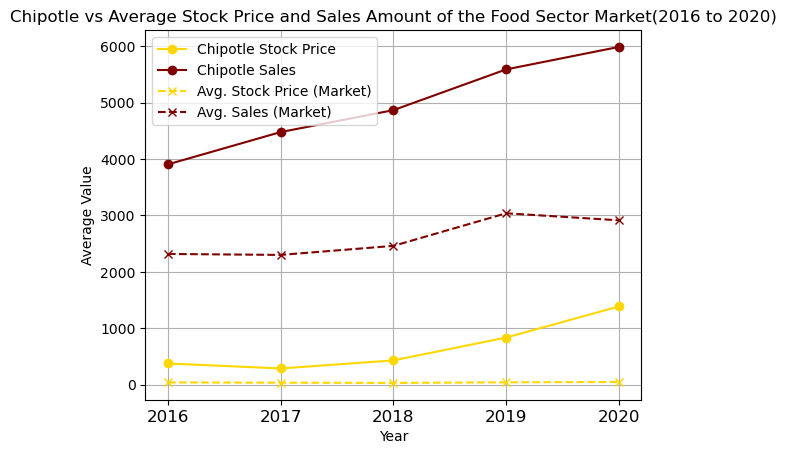

In [47]:
#data from 2016 to 2020
food_mkt = firms[(firms["fyear"] >= 2016) & (firms["fyear"] <= 2020)]
#print(food_mkt["gvkey"].nunique()) # total of 79 food companies in the market

chipotle_16_20 = food_mkt[food_mkt["gvkey"]==165914]
food_mkt_16_20= food_mkt[food_mkt["gvkey"]!=165914]

# Calculate average stock price and sales for the food market from 2016 to 2020
avg_sp = food_mkt_16_20.groupby("fyear")["prcc_c"].mean()
avg_sales = food_mkt_16_20.groupby("fyear")["sale"].mean()

# Plot Chipotle's stock price and sales
plt.plot(chipotle_16_20["fyear"], chipotle_16_20["prcc_c"], label="Chipotle Stock Price", marker="o", color=dark_yellow)
plt.plot(chipotle_16_20["fyear"], chipotle_16_20["sale"], label="Chipotle Sales", marker="o", color="maroon")

# Plot the average stock price and sales of the food market
plt.plot(avg_sp.index, avg_sp.values, label="Avg. Stock Price (Market)", linestyle="--", marker="x", color=dark_yellow )
plt.plot(avg_sales.index, avg_sales.values, label="Avg. Sales (Market)", linestyle="--", marker="x", color="maroon")

plt.legend()
plt.xticks(range(2016, 2021), fontsize=12)
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Chipotle vs Average Stock Price and Sales Amount of the Food Sector Market(2016 to 2020)')
plt.grid(True)
plt.show()


45


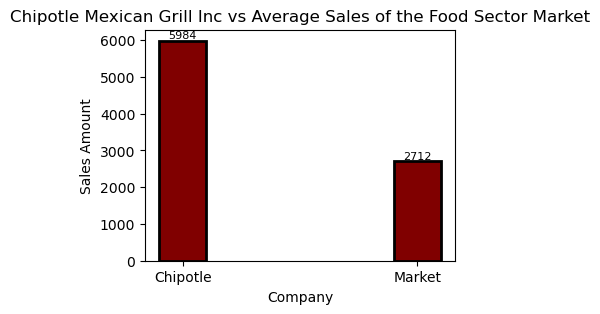

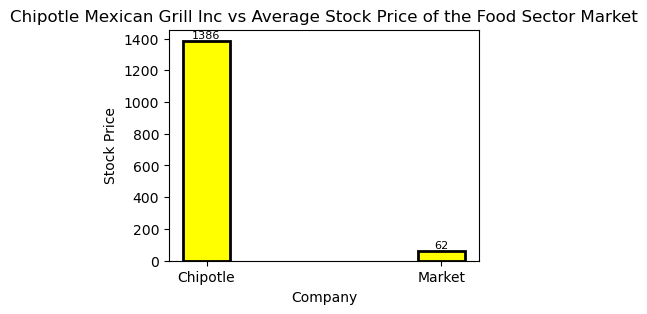

In [48]:
firm_focal=firms_10K[firms_10K["gvkey"]==165914]
firm_market=firms_10K[firms_10K["gvkey"]!=165914]
print(len(firm_market)) #compared with other 45 companies in the food market

# bar chart for sales amount
ff_x=int(firm_focal["sale"])
fm_x=int(firm_market["sale"].mean())
sale_key=np.array(["Chipotle","Market"])
sale_arr=np.array([ff_x,fm_x])
plt.figure(figsize=(4, 3))# Adjust the figure size as needed
plt.bar(sale_key, sale_arr,width = 0.2,color='maroon', edgecolor='black', linewidth=2, label='Sales')
plt.xlabel('Company')
plt.ylabel('Sales Amount')
plt.title('Chipotle Mexican Grill Inc vs Average Sales of the Food Sector Market')
for i in range(len(sale_key)):
    plt.text(sale_key[i], sale_arr[i], sale_arr[i], ha='center', va='bottom', fontsize=8)

# bar chart for stock price 
ff_y=int(firm_focal["prcc_c"])
fm_y=int(firm_market["prcc_c"].mean())
sale_key=np.array(["Chipotle","Market"])
sale_arr=np.array([ff_y,fm_y])
plt.figure(figsize=(4, 3))# Adjust the figure size as needed
plt.bar(sale_key, sale_arr,width = 0.2,color='yellow', edgecolor='black', linewidth=2, label='Sales')
plt.xlabel('Company')
plt.ylabel('Stock Price')
plt.title('Chipotle Mexican Grill Inc vs Average Stock Price of the Food Sector Market')
for i in range(len(sale_key)):
    plt.text(sale_key[i], sale_arr[i], sale_arr[i], ha='center', va='bottom', fontsize=8)
    
plt.show()
